<a href="https://colab.research.google.com/github/AjiSiwi/arunika-temuin/blob/master/Machine%20Learning/RIASEC_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset = pd.read_excel('Datasetpersonality.xlsx')

#Remove unwanted fatures and nan val

In [ ]:
## Hapus semua kolom yang tidak perlu ('introelapse' sampai 'source' + 'Unnamed: 93')
del_cols = list(dataset.columns)
del_cols = del_cols[del_cols.index('introelapse'):del_cols.index('surveyelapse') + 1] + del_cols[del_cols.index('VCL1'):-2]
del_cols.append('Unnamed: 93') ## Misah karena sebelum 'Unnamed: 93' ada 'major'
dataset.drop(columns = del_cols, inplace = True)
dataset.head()

,R1,R2,R3,R4,R5,R6,R7,R8,I1,I2,I3,I4,I5,I6,I7,I8,A1,A2,A3,A4,A5,A6,A7,A8,S1,S2,S3,S4,S5,S6,S7,S8,E1,E2,E3,E4,E5,E6,E7,E8,C1,C2,C3,C4,C5,C6,C7,C8,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,major
0,3,4,3,1,1,4,1,3,5,5,4,3,4,5,4,3,5,4,1,2,4,5,2,4,3,5,5,4,5,5,5,5,2,1,4,1,2,2,1,3,1,3,1,1,1,3,1,1,5,4,2,3,2,7,5,6,6,5,NaN
1,1,1,2,4,1,2,2,1,5,5,5,4,4,4,4,4,2,1,4,2,1,3,4,2,2,3,4,3,4,2,3,1,1,1,1,1,1,1,1,3,1,1,2,1,1,2,1,1,5,5,7,4,7,6,6,4,6,1,Nursing
2,2,1,1,1,1,1,1,1,4,1,1,1,1,1,1,1,1,1,1,2,1,1,3,1,3,1,5,3,5,5,4,4,1,3,3,5,1,4,4,3,1,3,2,2,1,2,4,1,6,4,3,7,5,1,7,1,5,3,NaN
3,3,1,1,2,2,2,2,2,4,1,2,4,3,2,3,2,5,2,4,5,1,4,4,2,4,2,3,3,2,1,3,2,5,4,3,2,3,3,2,3,3,2,3,3,2,2,2,2,5,2,7,7,5,7,6,2,3,6,NaN
4,4,1,1,2,1,1,1,2,5,5,5,3,5,5,5,3,3,5,5,5,5,5,1,5,5,4,4,4,5,5,5,5,2,3,2,3,2,4,2,2,4,2,2,4,5,5,2,2,6,7,1,7,4,7,7,5,4,7,education


In [ ]:
## Drop semua nilai NaN di kolom 'major'
dataset.dropna(subset = ['major'], inplace = True)
dataset.head(n = 5)

,R1,R2,R3,R4,R5,R6,R7,R8,I1,I2,I3,I4,I5,I6,I7,I8,A1,A2,A3,A4,A5,A6,A7,A8,S1,S2,S3,S4,S5,S6,S7,S8,E1,E2,E3,E4,E5,E6,E7,E8,C1,C2,C3,C4,C5,C6,C7,C8,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,major
1,1,1,2,4,1,2,2,1,5,5,5,4,4,4,4,4,2,1,4,2,1,3,4,2,2,3,4,3,4,2,3,1,1,1,1,1,1,1,1,3,1,1,2,1,1,2,1,1,5,5,7,4,7,6,6,4,6,1,Nursing
4,4,1,1,2,1,1,1,2,5,5,5,3,5,5,5,3,3,5,5,5,5,5,1,5,5,4,4,4,5,5,5,5,2,3,2,3,2,4,2,2,4,2,2,4,5,5,2,2,6,7,1,7,4,7,7,5,4,7,education
5,3,5,1,3,1,5,3,4,4,5,4,4,4,3,3,5,5,5,4,5,5,5,3,5,3,5,5,4,5,4,4,4,3,1,1,1,2,1,1,3,3,2,1,1,3,3,1,3,2,2,3,5,3,6,7,5,2,1,Literature
6,1,4,1,4,1,4,1,2,4,4,1,1,2,4,3,3,1,4,1,2,4,4,1,4,4,4,1,3,1,2,3,2,2,1,3,1,3,2,1,3,4,2,2,2,4,3,3,1,1,2,5,5,3,6,2,4,7,2,Math
7,5,1,2,2,2,1,2,1,4,4,4,4,5,4,5,2,3,4,4,3,3,4,2,3,4,3,4,4,4,4,5,3,4,3,3,3,4,3,3,2,2,4,2,2,4,2,2,2,7,6,5,4,6,3,7,5,5,3,mathematics and science


In [ ]:
dataset.describe()

,R1,R2,R3,R4,R5,R6,R7,R8,I1,I2,I3,I4,I5,I6,I7,I8,A1,A2,A3,A4,A5,A6,A7,A8,S1,S2,S3,S4,S5,S6,S7,S8,E1,E2,E3,E4,E5,E6,E7,E8,C1,C2,C3,C4,C5,C6,C7,C8,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10
count,93016.000000,93016.000000,93016.000000,93016.000000,93016.000000,93016.000000,93016.000000,93016.000000,93016.000000,93016.000000,93016.000000,93016.000000,93016.000000,93016.000000,93016.000000,93016.000000,93016.000000,93016.000000,93016.000000,93016.000000,93016.000000,93016.000000,93016.000000,93016.000000,93016.000000,93016.000000,93016.000000,93016.000000,93016.000000,93016.000000,93016.000000,93016.000000,93016.000000,93016.000000,93016.000000,93016.000000,93016.000000,93016.000000,93016.000000,93016.000000,93016.000000,93016.000000,93016.000000,93016.000000,93016.000000,93016.000000,93016.000000,93016.000000,93016.000000,93016.000000,93016.000000,93016.000000,93016.000000,93016.000000,93016.000000,93016.000000,93016.000000,93016.00000
mean,2.599510,2.159231,1.767148,2.275791,1.747732,2.271975,2.015911,1.997549,3.495076,3.373420,3.121194,3.049970,2.878053,3.011278,2.739109,2.570569,2.534962,2.881569,3.048615,2.986174,3.171820,3.275125,2.641922,2.883278,3.648673,3.726832,3.331997,3.207685,3.659080,3.138062,3.367840,2.950041,2.182227,2.333459,2.867603,2.384837,3.091705,2.634278,2.479208,2.702352,2.323213,2.386686,2.427163,2.544766,2.592608,2.685301,2.223703,2.290133,4.743485,3.843801,5.611755,4.007547,5.801690,4.442655,5.678872,3.004634,5.060420,2.86426
std,1.331506,1.237999,1.129328,1.322981,1.063493,1.280033,1.173387,1.181745,1.308098,1.349306,1.394411,1.392108,1.395648,1.399277,1.376069,1.396592,1.383200,1.422579,1.416182,1.433971,1.469019,1.430706,1.445234,1.420069,1.246227,1.199904,1.345967,1.323451,1.286787,1.385766,1.327164,1.339804,1.231759,1.218883,1.321820,1.295879,1.364212,1.327268,1.315817,1.355601,1.280509,1.249853,1.311122,1.283815,1.379090,1.298464,1.246698,1.252832,1.857313,1.855297,1.486915,1.918667,1.302085,1.939509,1.404150,1.839011,1.608531,1.73234
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,3.000000,3.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,2.000000,5.000000,2.000000,5.000000,3.000000,5.000000,1.000000,4.000000,1.00000
50%,3.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,4.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,4.000000,3.000000,2.000000,2.000000,3.000000,2.000000,3.000000,3.000000,2.000000,3.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,2.000000,5.000000,4.000000,6.000000,4.000000,6.000000,5.000000,6.000000,3.000000,5.000000,2.00000
75%,4.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,

#Data Cleaning for count labels

In [ ]:
import os
import random
import re
import string

In [ ]:
#lowercase all labels
lower = [str(i).lower() for i in dataset['major']]

In [ ]:
 #preprocessed all labels delete unwanted value
 removed =[]
 stopword = ['na','no','none','nil','yes','ge', 'me', 'aa','undecided','not sure',
             'i dont know','nothing','tesl','comm','unknown','i dont know yet', 'no idea',
             'nope','unsure','none yet','mbbs','other','hdfs','general studies'
             '21', 'non', 'ba', 'idk', 'xx', 'fbi', 'pr', 'hrm', 'cad', 'com', 'aas',
             'hr', 'bba', 'ota', 'nne', 'ecu', 'med', 'pha', 'pt', 'ir', 'acc', 
             'rhs', 'ust', '22', 'mis', 'ucf', 'psy', 'bsn', '932', 'eg', 'asl', 'hit',
             'ux', 'uav', 'â²z', '1st', 'ict', 'cpa', 'ibm', 'ggg', 'ems', 'cs', 'bus',
             'mpa', 'laa', 'htm', 'low', 'ma', 'ee', 'r n', 'eee', 're', 'cit', 'ged', 'eng',
             'usp', 'kl', 'md', 'dms', 'srt', 'ece', 'mph', 'mrc', 'vet', 'phd', 'crj', 'fu',
             'cj', 'ca', 'ler', 'bgs', 'sts', 'bbm', 'eco', 'cis', 'i t', 'abs', 'ect', 'bds',
             'lab', 'sac', 'ot', 'pta', 'bfa', 'pe', 'ag', 'ips', 'emt', 'kin', 'on', 
             'lex', 'bpa', 'bse', 'dd', 'deu', 'rn', 'msc', 'unm', 'sex', 'lae', 'ec', 'hm',
             'bca', 'nlp', 'rtf', 'cna', 'io', 'fcs', 'eet', 'lol', 'bis', 'mft', 'si',
             'gs', 'ilr', 'cbe', 'icm', 'rt', 'lax', 'vfx', '55', 'tv', 'hes', 'pcc', 'gis',
             'ibs', 'cse', 'gen', 'huh', 'hca', 'gb', 'ai', 'ise', 'rh', '50', 'lpn', 'bom',
             'bst', 'bee', 'esl', 'apk', 'abm', 'nn', 'phy', 'bsc', 'ed', 'hod', 'slp', 'utt',
             'shs', 'ppe', 'n a', 'dnp', 'hk', 'nun', 'how', 'mse', 'sw', 'uxd', 'ses', 'â€“',
             'mkt', 'war', 'bm', 'hpe', 'buh', 'lah', 'aoj', '10', 'fag', 'prm', 'car', 'lcc',
             'hsa', 'soc', 'edu', 'mls', 'msw', 'its', 'f b', 'all', '304', 'bs', 'et', 'bib',
             'csd', '42', 'jhv', '46', 'tle','bra', 'idn', 'bhm', 'uh', '81', 'hsp', 'ras',
             'ids', 'ce', 'nba', 'ite','buts', 'tech', 'arch', 'fire', 'undeclared', 'general'
             'chef', 'econ','poop', 'tour', 'what', 'army', 'auto', 'cook', 'rotc',
             'full', 'pych', 'blis', 'bece', 'csim', 'cepe', 'fycs', 'blah', 'arte', 'matj',
             'bbit', 'open', 'golf', 'cmhc', 'selu', 'magh', 'idst', 'ieti', 'adpr', 'food',
             'tefl', 'jour', 'ucla', 'coms', 'good', 'hrwd', 'bcom', 'bsba', 'succ', 'psyc',
             'slhs', 'bhpe', 'b sc', 'busn', 'b ed', 'hvac', 'nã£o', 'duke',  '2323',
             '3659', '1575', 'acct', 'seem', 'eecs', 'wwii', 'chem', 'kine', 'duno', 
             '1578', 'weed', 'hrir', 'stat', 'artl', '1212', 'uitm', 'i dk', 'mlis', 'umuc', 
             'accy', 'both', 'chad', 'mcom', 'idek', 'oshe', 'test', 'stem', 'bafs', 'hrmn', 
             'cdfs', 'rtvf', 'mgmt', 'nien', 'sdfg', 'nice', 'dogs', 'host', '1056', 'civi', 
             'shop', 'cota', 'ncaa', 'bite', 'mech', 'cafs', 'diet', 'pscm', 'ocpt', 'bmcc', 
             'huyt', 'yoga', 'nail', 'cjhs', 'dota', 'mice', 'osha', '1589', 'ifsm', '1602', 
             'cntt', 'txmd', 'tvet', 'artd', 'pepe', 'care', 'engg']
 for text in lower:
  text = text.strip()
  text = re.sub(r"\[(.*?)\]", "", text)  # Remove [+XYZ chars] in content
  text = re.sub(r"\s+", " ", text)  # Remove multiple spaces in content
  text = re.sub(r"\w+…|…", "", text)  # Remove ellipsis (and last word)
  text = re.sub(r"(?<=\w)-(?=\w)", " ", text)  # Replace dash between words
  text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)  # Remove punctuation
  if len(text)>1:
    #remove stopword
    if text not in stopword:
      #remove digit value
      if text.isdigit() == False:
        removed.append(text)

In [ ]:
#check small word
smallword =[]
knew =['art','it','law','mba']
for i in removed:
  if len(i)<=4:
    if i not in smallword:
     smallword.append(i)
print(smallword)

['math', 'art', 'it', 'law', 'mba', 'film', 'arts', 'flim', 'bio', 'laws', 'dkv', 'bank', 'hrd']


In [ ]:
lower_labels = pd.DataFrame(removed)

In [ ]:
def sort_list(list1, list2):
    zipped_pairs = zip(list2, list1)
    z = [x for _, x in sorted(zipped_pairs,reverse=True)]
    
    return z

In [ ]:
unique_labels,counts=np.unique(np.array(removed), return_counts=True)

sorted_uniq_labels = sort_list(unique_labels,counts)

print(len(sorted_uniq_labels))
print(sorted_uniq_labels[:10])


11062
['psychology', 'business', 'english', 'nursing', 'biology', 'education', 'engineering', 'accounting', 'computer science', 'law']


In [ ]:
unique_labels_tupple[1:4]

[('business', 3849), ('english', 3249), ('nursing', 2399)]

#data distribution before relabeling

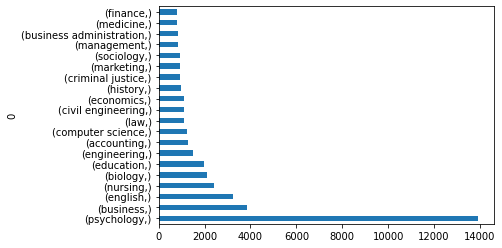

In [ ]:
lower_labels.value_counts()[:20].plot(kind='barh')

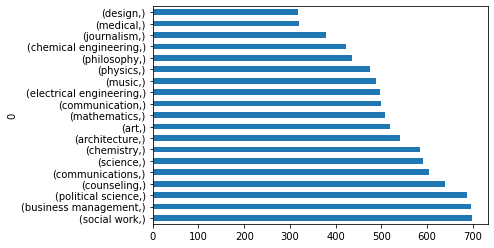

In [ ]:
lower_labels.value_counts()[21:40].plot(kind='barh')

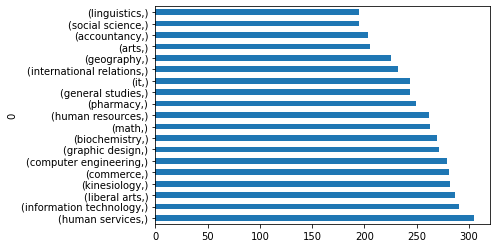

In [ ]:
lower_labels.value_counts()[41:60].plot(kind='barh')

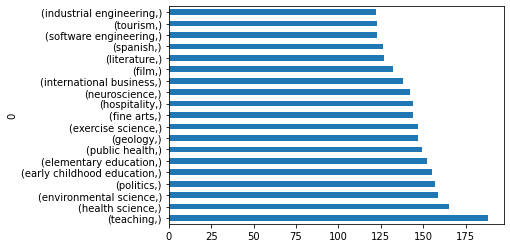

In [ ]:
lower_labels.value_counts()[61:80].plot(kind='barh')

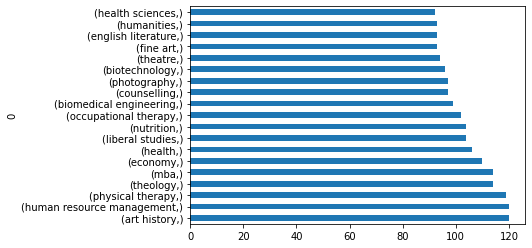

In [ ]:
lower_labels.value_counts()[81:100].plot(kind='barh')

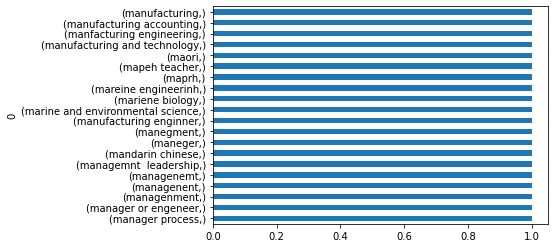

In [ ]:
lower_labels.value_counts()[11000:11020].plot(kind='barh')

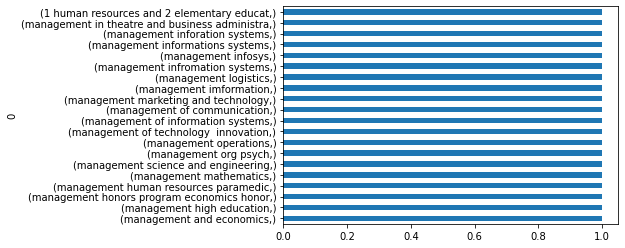

In [ ]:
lower_labels.value_counts()[11042:].plot(kind='barh')

In [ ]:
len(lower_labels)

90254

In [ ]:
total = sum(lower_labels.value_counts()[1:150])
print(total)

52397


In [ ]:
preprocessed = [[i] for i in removed]

In [ ]:
preprocessed[:10]

[['nursing'],
 ['education'],
 ['literature'],
 ['math'],
 ['mathematics and science'],
 ['family resource management'],
 ['counselling'],
 ['business'],
 ['communication'],
 ['information technology']]

In [ ]:
#Word2Vec

#word2vec


In [ ]:
from gensim.models import Word2Vec
labels = dataset['major']
model = Word2Vec(preprocessed, min_count=5)

In [ ]:
print(len(model.wv.vocab))

950


In [ ]:
model.wv.most_similar("science")

[('material engineering', 0.2810918390750885),
 ('construction', 0.26494044065475464),
 ('supply chain management', 0.25255125761032104),
 ('mortuary science', 0.24925251305103302),
 ('english and education', 0.24401693046092987),
 ('ministry', 0.2365761697292328),
 ('pharmacy', 0.23076853156089783),
 ('industrial organizational psychology', 0.2299923300743103),
 ('administration of justice', 0.22940778732299805),
 ('business administrative', 0.22351272404193878)]

In [ ]:
model.wv.most_similar("psychology")

[('graphic communications', 0.3417717218399048),
 ('writing', 0.33408287167549133),
 ('entrepreneurship', 0.30393147468566895),
 ('medical reimbursement and coding', 0.28906044363975525),
 ('dance', 0.27778705954551697),
 ('doctor', 0.26310479640960693),
 ('general business', 0.2587200999259949),
 ('businesspsychology', 0.25061601400375366),
 ('english studies', 0.24561135470867157),
 ('biology and psychology', 0.24359244108200073)]

In [ ]:
model.wv.most_similar("engineering")

[('development studies', 0.3124024271965027),
 ('digital marketing', 0.27241912484169006),
 ('manager', 0.25401708483695984),
 ('social services', 0.24654699862003326),
 ('horticulture', 0.2349369078874588),
 ('industrial design', 0.23069530725479126),
 ('political economy', 0.22795021533966064),
 ('psychologyenglish', 0.22785571217536926),
 ('mental health counseling', 0.2241458147764206),
 ('international business management', 0.22327543795108795)]

In [ ]:
model.wv.most_similar("art")

[('interior design', 0.32116246223449707),
 ('psychiatry', 0.2860942482948303),
 ('law enforcement', 0.2793060541152954),
 ('bible', 0.2712748646736145),
 ('engineer', 0.2637890577316284),
 ('education and psychology', 0.24853406846523285),
 ('physics', 0.24363644421100616),
 ('computing science', 0.23026475310325623),
 ('communication and media', 0.22706787288188934),
 ('civil engeneering', 0.2222345471382141)]

In [ ]:
for i in model.wv.vocab:
  print(i)

nursing
education
literature
math
counselling
business
communication
information technology
languages
accounting
psychology
music
pre nursing
public health
civil engineering
graphic design
social work
art
sociology
culinary
anthropology
it
business admin
management
english
pschology
clinical psychology
foreign language
engineering
law
economics
business management
computer engineer
chemical engineering
history
electronics
hospitality
information systems management
drama
architectural studies
political science
pedagogy
finance
chemistry
business administration
biology
exercise science
computer science
phsycology
interior design
social sciences
organizational management
english and education
mining engineering
occupational therapy
science
mba
electronic engineering
arts and design
marketing
early childhood education
criminology
leadership
criminal justice
computer engineering technology
pharmacy
general studies
undeclared
environmental science
game design
film
psychology and counseling
s

#Label Dict Maker

In [ ]:
def GeneralLabelsDict(labels_list):
  LabelsDict = {'science and technology':[], 'literature':[], 'arts':[], 'psychology':[], 'sports':[],
                  'social studies':[],'education':[], 'outdoor activities':[]}
  
  for label in labels_list:
    if label in LabelsDict.keys():
      LabelsDict[label].append(label)
      print('add {} automatically'.format(label))
    else:
      print(label)
      choosedLabel = input('Replace with: ')
      if choosedLabel in LabelsDict.keys():
        LabelsDict[choosedLabel].append(label)
      else:
        print('Wrong input')
  
  return LabelsDict

In [ ]:
LabelsDict = GeneralLabelsDict(sorted_uniq_labels[:150])

add psychology automatically
business
Replace with: social studies
english
Replace with: literature
nursing
Replace with: science and technology
biology
Replace with: science and technology
add education automatically
engineering
Replace with: science and technology
accounting
Replace with: social studies
computer science
Replace with: science and technology
law
Replace with: social studies
civil engineering
Replace with: science and technology
economics
Replace with: social studies
history
Replace with: social studies
criminal justice
Replace with: social studies
marketing
Replace with: social studies
sociology
Replace with: social studies
management
Replace with: social studies
business administration
Replace with: social studies
medicine
Replace with: science and technology
finance
Replace with: social studies
mechanical engineering
Replace with: science and technology
social work
Replace with: social studies
business management
Replace with: social studies
political science
Replace

In [ ]:
print(LabelsDict)

{'science and technology': ['nursing', 'biology', 'engineering', 'computer science', 'civil engineering', 'medicine', 'mechanical engineering', 'science', 'chemistry', 'mathematics', 'electrical engineering', 'physics', 'chemical engineering', 'medical', 'information technology', 'kinesiology', 'computer engineering', 'biochemistry', 'math', 'pharmacy', 'it', 'geography', 'health science', 'environmental science', 'public health', 'geology', 'exercise science', 'hospitality', 'neuroscience', 'software engineering', 'industrial engineering', 'physical therapy', 'health', 'nutrition', 'occupational therapy', 'biomedical engineering', 'biotechnology', 'health sciences', 'microbiology', 'electronic engineering', 'dentistry', 'biomedical science', 'hospitality management', 'aerospace engineering', 'zoology', 'animal science', 'statistics', 'maths', 'electronics engineering', 'rehabilitation services', 'pre med', 'doctor', 'agriculture', 'computer', 'information systems', 'computing', 'archa

In [ ]:
del LabelsDict['outdoor activities']

In [ ]:
del LabelsDict['sports']

In [ ]:
i=0
for i in range(len(LabelsDict['education'])):
  val = LabelsDict['education'][i]
  if val == 'undeclared' or val =='general studies' or val =='general':
    del LabelsDict['education'][i]

In [ ]:
for i in range(len(LabelsDict['education'])):
  val = LabelsDict['education'][i]
  print(val)

education
counseling
teaching
elementary education
counselling
special education
physical education
child development


In [ ]:
import csv
with open('LabelsDict.csv', 'w') as csv_file:  
    writer = csv.writer(csv_file)
    for key, value in LabelsDict.items():
       writer.writerow([key, value])

In [ ]:
manualLabelsDict ={'science': ['nursing', 'biology', 'medicine',  'science', 'chemistry', 'mathematics', 'physics',  'medical', 'kinesiology', 'biochemistry', 'math', 'pharmacy','health science', 'environmental science',  'exercise science', 'neuroscience', 'physical therapy', 'health', 'nutrition',  'health sciences', 'microbiology','dentistry', 'zoology', 'animal science', 'statistics', 'maths', 'doctor', 'agriculture',  'physiology', 'applied science'],
                   'technology':['engineering', 'computer science', 'civil engineering', 'mechanical engineering','electrical engineering','electrical engineering','chemical engineering','information technology', 'computer engineering','it','software engineering', 'industrial engineering','biomedical engineering', 'electronic engineering', 'aerospace engineering',  'electronics engineering', 'medical technology', 'aviation','computer', 'information systems', 'computing'],
                   'literature': ['english', 'journalism', 'anthropology', 'linguistics', 'literature', 'spanish', 'french', 'english literature', 'languages'],
                   'arts': ['art', 'music', 'design', 'liberal arts', 'graphic design', 'arts', 'fine arts', 'film', 'photography', 'theatre', 'fine art', 'advertising', 'media', 'culinary arts', 'music education', 'culinary', 'animation'],
                   'psychology': ['psychology'],
                   'social': ['law', 'criminal justice', 'sociology',  'social work','political science', 'communications', 'communication',  'human services', 'human resources', 'international relations', 'criminology', 'politics', 'international business', 'human resource management', 'theology', 'liberal studies', 'humanities', 'human development', 'human resource', 'international studies', 'public relations', 'communication studies', 'mass communication'], 
                   'economics':['business', 'accounting','economics','marketing','management', 'finance', 'commerce', 'accountancy','mba', 'economy',  'buisness', 'business management'],
                   'education': ['education', 'counseling', 'teaching', 'elementary education', 'counselling', 'special education', 'physical education', 'child development']}

In [ ]:
manualLabelsDict

{'arts': ['art',
  'music',
  'design',
  'liberal arts',
  'graphic design',
  'arts',
  'fine arts',
  'film',
  'photography',
  'theatre',
  'fine art',
  'advertising',
  'media',
  'culinary arts',
  'music education',
  'culinary',
  'animation'],
 'economics': ['business',
  'accounting',
  'economics',
  'marketing',
  'management',
  'finance',
  'commerce',
  'accountancy',
  'mba',
  'economy',
  'buisness',
  'business management'],
 'education': ['education',
  'counseling',
  'teaching',
  'elementary education',
  'counselling',
  'special education',
  'physical education',
  'child development'],
 'literature': ['english',
  'journalism',
  'anthropology',
  'linguistics',
  'literature',
  'spanish',
  'french',
  'english literature',
  'languages'],
 'psychology': ['psychology'],
 'science': ['nursing',
  'biology',
  'medicine',
  'science',
  'chemistry',
  'mathematics',
  'physics',
  'medical',
  'kinesiology',
  'biochemistry',
  'math',
  'pharmacy',
  'heal

#Manual Labeling

##dataset['major'] data cleaning

In [ ]:
#lowercase all labels
dataset['major'] = dataset['major'].str.lower()
dataset.head()

,R1,R2,R3,R4,R5,R6,R7,R8,I1,I2,I3,I4,I5,I6,I7,I8,A1,A2,A3,A4,A5,A6,A7,A8,S1,S2,S3,S4,S5,S6,S7,S8,E1,E2,E3,E4,E5,E6,E7,E8,C1,C2,C3,C4,C5,C6,C7,C8,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,major
1,1,1,2,4,1,2,2,1,5,5,5,4,4,4,4,4,2,1,4,2,1,3,4,2,2,3,4,3,4,2,3,1,1,1,1,1,1,1,1,3,1,1,2,1,1,2,1,1,5,5,7,4,7,6,6,4,6,1,nursing
4,4,1,1,2,1,1,1,2,5,5,5,3,5,5,5,3,3,5,5,5,5,5,1,5,5,4,4,4,5,5,5,5,2,3,2,3,2,4,2,2,4,2,2,4,5,5,2,2,6,7,1,7,4,7,7,5,4,7,education
5,3,5,1,3,1,5,3,4,4,5,4,4,4,3,3,5,5,5,4,5,5,5,3,5,3,5,5,4,5,4,4,4,3,1,1,1,2,1,1,3,3,2,1,1,3,3,1,3,2,2,3,5,3,6,7,5,2,1,literature
6,1,4,1,4,1,4,1,2,4,4,1,1,2,4,3,3,1,4,1,2,4,4,1,4,4,4,1,3,1,2,3,2,2,1,3,1,3,2,1,3,4,2,2,2,4,3,3,1,1,2,5,5,3,6,2,4,7,2,math
7,5,1,2,2,2,1,2,1,4,4,4,4,5,4,5,2,3,4,4,3,3,4,2,3,4,3,4,4,4,4,5,3,4,3,3,3,4,3,3,2,2,4,2,2,4,2,2,2,7,6,5,4,6,3,7,5,5,3,mathematics and science


In [ ]:
 #preprocessed all labels delete unwanted value
 new_elemen =pd.DataFrame()
 stopword = ['na','no','none','nil','yes','ge', 'me', 'aa','undecided','not sure','',
             'i dont know','nothing','tesl','comm','unknown','i dont know yet', 'no idea',
             'nope','unsure','none yet','mbbs','other','hdfs','general studies'
             '21', 'non', 'ba', 'idk', 'xx', 'fbi', 'pr', 'hrm', 'cad', 'com', 'aas',
             'hr', 'bba', 'ota', 'nne', 'ecu', 'med', 'pha', 'pt', 'ir', 'acc', 
             'rhs', 'ust', '22', 'mis', 'ucf', 'psy', 'bsn', '932', 'eg', 'asl', 'hit',
             'ux', 'uav', 'â²z', '1st', 'ict', 'cpa', 'ibm', 'ggg', 'ems', 'cs', 'bus',
             'mpa', 'laa', 'htm', 'low', 'ma', 'ee', 'r n', 'eee', 're', 'cit', 'ged', 'eng',
             'usp', 'kl', 'md', 'dms', 'srt', 'ece', 'mph', 'mrc', 'vet', 'phd', 'crj', 'fu',
             'cj', 'ca', 'ler', 'bgs', 'sts', 'bbm', 'eco', 'cis', 'i t', 'abs', 'ect', 'bds',
             'lab', 'sac', 'ot', 'pta', 'bfa', 'pe', 'ag', 'ips', 'emt', 'kin', 'on', 
             'lex', 'bpa', 'bse', 'dd', 'deu', 'rn', 'msc', 'unm', 'sex', 'lae', 'ec', 'hm',
             'bca', 'nlp', 'rtf', 'cna', 'io', 'fcs', 'eet', 'lol', 'bis', 'mft', 'si',
             'gs', 'ilr', 'cbe', 'icm', 'rt', 'lax', 'vfx', '55', 'tv', 'hes', 'pcc', 'gis',
             'ibs', 'cse', 'gen', 'huh', 'hca', 'gb', 'ai', 'ise', 'rh', '50', 'lpn', 'bom',
             'bst', 'bee', 'esl', 'apk', 'abm', 'nn', 'phy', 'bsc', 'ed', 'hod', 'slp', 'utt',
             'shs', 'ppe', 'n a', 'dnp', 'hk', 'nun', 'how', 'mse', 'sw', 'uxd', 'ses', 'â€“',
             'mkt', 'war', 'bm', 'hpe', 'buh', 'lah', 'aoj', '10', 'fag', 'prm', 'car', 'lcc',
             'hsa', 'soc', 'edu', 'mls', 'msw', 'its', 'f b', 'all', '304', 'bs', 'et', 'bib',
             'csd', '42', 'jhv', '46', 'tle','bra', 'idn', 'bhm', 'uh', '81', 'hsp', 'ras',
             'ids', 'ce', 'nba', 'ite','buts', 'tech', 'arch', 'fire', 'undeclared', 'general'
             'chef', 'econ','poop', 'tour', 'what', 'army', 'auto', 'cook', 'rotc',
             'full', 'pych', 'blis', 'bece', 'csim', 'cepe', 'fycs', 'blah', 'arte', 'matj',
             'bbit', 'open', 'golf', 'cmhc', 'selu', 'magh', 'idst', 'ieti', 'adpr', 'food',
             'tefl', 'jour', 'ucla', 'coms', 'good', 'hrwd', 'bcom', 'bsba', 'succ', 'psyc',
             'slhs', 'bhpe', 'b sc', 'busn', 'b ed', 'hvac', 'nã£o', 'duke',  '2323',
             '3659', '1575', 'acct', 'seem', 'eecs', 'wwii', 'chem', 'kine', 'duno', 
             '1578', 'weed', 'hrir', 'stat', 'artl', '1212', 'uitm', 'i dk', 'mlis', 'umuc', 
             'accy', 'both', 'chad', 'mcom', 'idek', 'oshe', 'test', 'stem', 'bafs', 'hrmn', 
             'cdfs', 'rtvf', 'mgmt', 'nien', 'sdfg', 'nice', 'dogs', 'host', '1056', 'civi', 
             'shop', 'cota', 'ncaa', 'bite', 'mech', 'cafs', 'diet', 'pscm', 'ocpt', 'bmcc', 
             'huyt', 'yoga', 'nail', 'cjhs', 'dota', 'mice', 'osha', '1589', 'ifsm', '1602', 
             'cntt', 'txmd', 'tvet', 'artd', 'pepe', 'care', 'engg']
 for i in dataset['major'].index:
  text = str(dataset['major'][i])
  text = text.strip()
  text = re.sub(r"\[(.*?)\]", "", text)  # Remove [+XYZ chars] in content
  text = re.sub(r"\s+", " ", text)  # Remove multiple spaces in content
  text = re.sub(r"\w+…|…", "", text)  # Remove ellipsis (and last word)
  text = re.sub(r"(?<=\w)-(?=\w)", " ", text)  # Replace dash between words
  text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)  # Remove punctuation
  if text in stopword:
    #drop
    dataset.drop(index=i, inplace=True)

  #if text.isdigit():
   # dataset.drop(index=i, inplace=True)


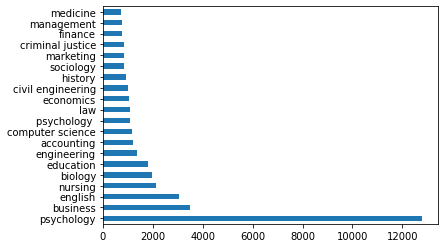

In [ ]:
dataset['major'].value_counts()[:20].plot(kind='barh')

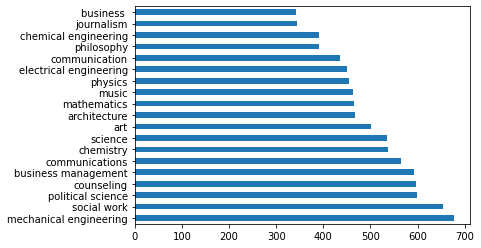

In [ ]:
dataset['major'].value_counts()[21:40].plot(kind='barh')

In [ ]:
len(dataset['major'].unique())

12400

##relabeling

In [ ]:
def relabeling(LabelsDict,dataset):

  listVal = list(LabelsDict.values())
  newlistVal = []
  for ii in range(len(listVal)):
    newlistVal.extend(listVal[ii])

  for i in dataset['major'].index:
    major = str(dataset['major'][i])

    if major not in newlistVal:
      dataset.drop(index=i, inplace=True)
    else:
      if major in LabelsDict ['psychology']:
        #replace value with the key
        dataset.at[i,'major'] = 'psychology'
      elif major in LabelsDict ['social']:
        #replace value with the key
        dataset.at[i,'major'] = 'social'
      elif major in LabelsDict ['education']:
        #replace value with the key
        dataset.at[i,'major'] = 'education'
      elif major in LabelsDict ['arts']:
        #replace value with the key
        dataset.at[i,'major'] = 'arts and literature'
      elif major in LabelsDict ['literature']:
        #replace value with the key
        dataset.at[i,'major'] = 'arts and literature'
      elif major in LabelsDict ['science']:
        #replace value with the key
        dataset.at[i,'major'] = 'science'
      elif major in LabelsDict ['technology']:
        #replace value with the key
        dataset.at[i,'major'] = 'technology'
      elif major in LabelsDict ['economics']:
        #replace value with the key
        dataset.at[i,'major'] = 'economics'
  return dataset


In [ ]:
preprocessed = relabeling(manualLabelsDict,dataset)

In [ ]:
count_psy = 0
for i in preprocessed['major'].index:
    major = str(preprocessed['major'][i])
    if major == 'psychology':
      count_psy+=1
      if count_psy>1000:
        preprocessed.drop(index=i, inplace=True)

print(count_psy)

12780


In [ ]:
for i in preprocessed['major'].index:
    major = str(preprocessed['major'][i])
    if major == 'psychology':
      preprocessed.drop(index=i, inplace=True)
      #preprocessed.at[i,'major'] = 'social'

In [ ]:
for i in preprocessed['major'].index:
    major = str(preprocessed['major'][i])
    if major == 'education':
      preprocessed.drop(index=i, inplace=True)
      #preprocessed.at[i,'major'] = 'arts and literature'

In [ ]:
count_sci = 0
for i in preprocessed['major'].index:
    major = str(preprocessed['major'][i])
    if major == 'science':
      count_sci+=1
      if count_sci>7000:
        preprocessed.drop(index=i, inplace=True)

print(count_sci)

7500


In [ ]:
count_eco = 0
for i in preprocessed['major'].index:
    major = str(preprocessed['major'][i])
    if major == 'economics':
      count_eco+=1
      if count_eco>7000:
        preprocessed.drop(index=i, inplace=True)

print(count_eco)

7500


In [ ]:
count_sos = 0
for i in preprocessed['major'].index:
    major = str(preprocessed['major'][i])
    if major == 'social':
      count_sos+=1
      if count_sos>10000:
        preprocessed.drop(index=i, inplace=True)

print(count_sos)

19752


In [ ]:
print(len(preprocessed['major'].unique()))

3


In [ ]:
print(len(preprocessed['major']))

31642


In [ ]:
preprocessed.head()

,R1,R2,R3,R4,R5,R6,R7,R8,I1,I2,I3,I4,I5,I6,I7,I8,A1,A2,A3,A4,A5,A6,A7,A8,S1,S2,S3,S4,S5,S6,S7,S8,E1,E2,E3,E4,E5,E6,E7,E8,C1,C2,C3,C4,C5,C6,C7,C8,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,major
1,1,1,2,4,1,2,2,1,5,5,5,4,4,4,4,4,2,1,4,2,1,3,4,2,2,3,4,3,4,2,3,1,1,1,1,1,1,1,1,3,1,1,2,1,1,2,1,1,5,5,7,4,7,6,6,4,6,1,scintech
4,4,1,1,2,1,1,1,2,5,5,5,3,5,5,5,3,3,5,5,5,5,5,1,5,5,4,4,4,5,5,5,5,2,3,2,3,2,4,2,2,4,2,2,4,5,5,2,2,6,7,1,7,4,7,7,5,4,7,education
5,3,5,1,3,1,5,3,4,4,5,4,4,4,3,3,5,5,5,4,5,5,5,3,5,3,5,5,4,5,4,4,4,3,1,1,1,2,1,1,3,3,2,1,1,3,3,1,3,2,2,3,5,3,6,7,5,2,1,arts and literature
6,1,4,1,4,1,4,1,2,4,4,1,1,2,4,3,3,1,4,1,2,4,4,1,4,4,4,1,3,1,2,3,2,2,1,3,1,3,2,1,3,4,2,2,2,4,3,3,1,1,2,5,5,3,6,2,4,7,2,scintech
9,4,2,2,2,2,2,3,2,2,2,2,2,2,3,2,2,3,3,4,3,4,3,2,4,3,4,4,3,4,4,4,4,2,3,3,3,3,4,3,3,4,4,3,4,4,4,3,3,2,2,7,2,7,6,6,2,6,1,education


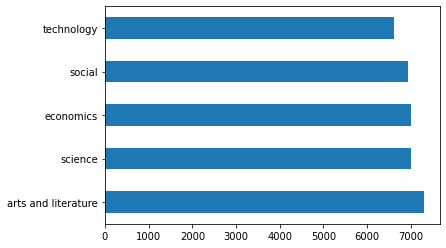

In [ ]:
preprocessed['major'].value_counts().plot(kind='barh')

In [ ]:
## Run cell ini kalau yakin udah mau save
filename = 'preprocessed_RIASEC_3Class.xlsx'
preprocessed.to_excel(filename)

In [ ]:
preprocessed

,R1,R2,R3,R4,R5,R6,R7,R8,I1,I2,I3,I4,I5,I6,I7,I8,A1,A2,A3,A4,A5,A6,A7,A8,S1,S2,S3,S4,S5,S6,S7,S8,E1,E2,E3,E4,E5,E6,E7,E8,C1,C2,C3,C4,C5,C6,C7,C8,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,major
1,1,1,2,4,1,2,2,1,5,5,5,4,4,4,4,4,2,1,4,2,1,3,4,2,2,3,4,3,4,2,3,1,1,1,1,1,1,1,1,3,1,1,2,1,1,2,1,1,5,5,7,4,7,6,6,4,6,1,science
5,3,5,1,3,1,5,3,4,4,5,4,4,4,3,3,5,5,5,4,5,5,5,3,5,3,5,5,4,5,4,4,4,3,1,1,1,2,1,1,3,3,2,1,1,3,3,1,3,2,2,3,5,3,6,7,5,2,1,arts and literature
6,1,4,1,4,1,4,1,2,4,4,1,1,2,4,3,3,1,4,1,2,4,4,1,4,4,4,1,3,1,2,3,2,2,1,3,1,3,2,1,3,4,2,2,2,4,3,3,1,1,2,5,5,3,6,2,4,7,2,science
10,1,1,4,2,1,1,1,1,3,3,1,4,3,3,3,2,4,5,2,4,5,2,2,3,5,4,4,4,4,2,4,2,3,2,5,4,5,4,3,2,1,1,1,1,1,3,1,1,6,5,7,1,7,5,5,1,7,2,economics
12,5,3,3,3,3,3,3,3,5,5,4,3,3,3,3,3,5,5,5,5,4,4,5,5,5,5,4,5,5,5,4,4,5,5,5,5,5,5,5,4,3,5,4,4,3,4,5,5,6,3,7,5,7,1,7,1,6,1,social
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145780,3,1,4,5,4,5,4,2,2,4,2,4,3,2,3,5,1,1,4,1,1,1,5,3,4,4,3,1,4,1,1,0,3,2,1,1,3,1,2,4,4,4,4,4,5,5,5,3,5,4,3,6,3,7,4,7,2,2,technology
145796,3,1,2,1,1,2,1,2,1,3,3,1,2,2,2,3,1,1,1,1,2,1,3,1,1,1,1,1,1,2,2,1,1,1,2,1,3,1,3,2,2,2,3,2,3,3,2,1,3,2,7,2,6,7,7,2,7,4,social
145803,2,3,1,3,1,4,1,3,3,4,3,3,4,5,1,2,2,2,2,1,4,1,2,2,4,4,4,4,4,3,4,3,1,1,3,4,2,2,3,4,1,1,1,1,3,2,1,1,2,3,5,5,6,6,4,1,5,6,social
145823,2,1,1,1,1,1,1,2,2,3,2,2,3,3,2,2,2,4,4,4,3,4,3,4,4,4,3,4,4,4,4,1,3,1,4,4,2,2,1,3,1,2,1,2,3,2,1,1,3,3,3,5,7,6,7,5,5,4,social


# New Data Distribution